# Computational Social Science Project #3 

**Enter your Name:** Alexander Adia

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [7]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier



In [8]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [9]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [10]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [11]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [12]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

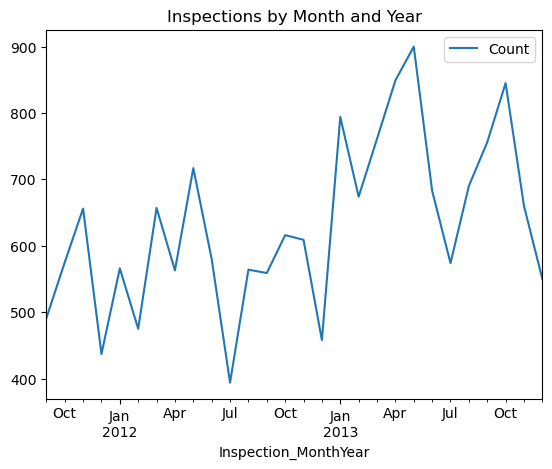

In [13]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

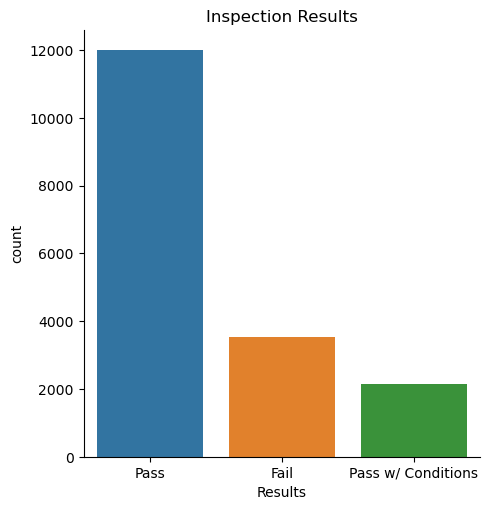

In [14]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

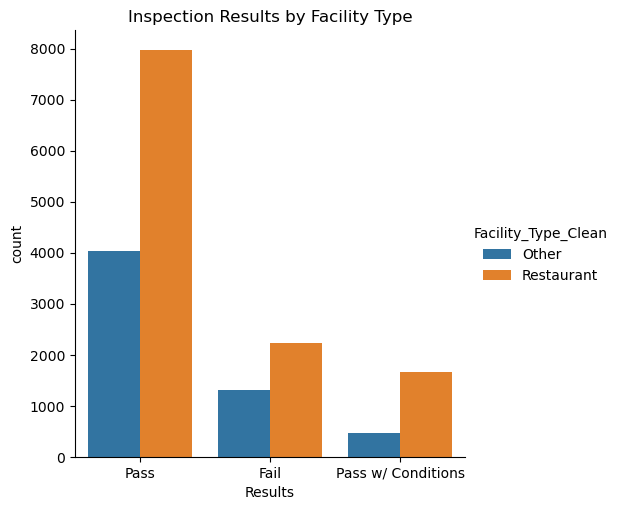

In [15]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [16]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [17]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [18]:
# view feature datset
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: AdaBoost

AdaBoost is an ensemble method that utilizes several learners (in this case, trees) to get towards a comparatively stronger learner that, in aggregating the individual learners (trees), performs better than any individual learner (tree) by itself. AdaBoost prioritizes weight assignment of each individual learner by addressing weight of misclassified data points. 

Given we are trying to predict potential violations to allocate audits, this ensemble method that tries to minimize misclassification is potentially useful.

We begin by importing the appropriate package 

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [15]:
# calculate mean score across models 
# ----------
scores.mean()

0.9143099419058043

###  Model 2: xgboost

Gradient boosting is also an ensemble method that utilizes several learners (in this case, trees) similar to AdaBoost. However, instead of addressing misclassified cases and updating the weights, xgBoost focuses on the overall residual error for each tree and aims to minimize this error in subsequent cases. XGBoost does this and has some more features/advantages that makes implementation easier computationally and practically, as well as adding some regularization that regular boosting doesn't.

Given we are trying to predict potential violations to allocate audits, this ensemble method that tries to minimize the residual error is potentially useful.

We begin by importing the appropriate package 

In [5]:
import xgboost as xgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:0000:0100:01
  Using cached numpy-1.24.4-cp39-cp39-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [17]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 

In [18]:
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")


accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


### Model 3: Voting Classifier

VotingClassifier works as taking a majority "vote" of specified algorithms in getting a final prediction. In getting to the final result, the amalgamation of the different algorithms can be based on majority vote of the prediction ("hard") or based on probability associated with prediction, which also integrates the level of confidence in classification that each model brings ("soft"). 

Again, it makes sense to see if we can boost prediction by going outside of just one algorithm (or single ensemble method). 

In [19]:
from sklearn.ensemble import VotingClassifier

In [20]:
# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

# AdaBoost
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

# XGBoost
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier),
                                     ('xgb', xgb_classifier)],
                        # specify voting
                        voting = 'hard')

# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       xgb_classifier,
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'XGBoost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.91 [Ada Boost]
Accuracy: 0.92 [XGBoost]
Accuracy: 0.92 [Ensemble]


In [21]:
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier), 
                                     ('xgb', xgb_classifier)],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, 
                                                              rf_classifier,
                                                              ada_classifier,
                                                              xgb_classifier,
                                                              voting_classifier)]

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

A: I argue that, with limited ability to audit, the most important thing is recall, or the ability to maximize the identification o true positive cases of violations of food safety standards. Assuming that truly impactful violations (e.g., those that actually have a threat for public health like allowing for a foodborne illness outbreak) are somewhat of a rare event, the impact of such violations is such that allocating resources towards addressing as many true positive cases as possible is imperative - the impact of a false positive is less than that of a false negative. 

A loop to get these metrics is shown below. Because this took a while to run, I copy over my results:

#### Evaluating AdaBoostClassifier:

accuracy: 0.9143 (+/- 0.0130)

recall: 0.8180 (+/- 0.0945)

precision: 0.7718 (+/- 0.0339)

f1: 0.7932 (+/- 0.0403)


#### Evaluating XGBClassifier:

accuracy: 0.9182 (+/- 0.0089)

recall: 0.8348 (+/- 0.0468)

precision: 0.7774 (+/- 0.0432)

f1: 0.8046 (+/- 0.0179)


#### Evaluating VotingClassifier:

accuracy: 0.9230 (+/- 0.0115)

recall: 0.8685 (+/- 0.0576)

precision: 0.7772 (+/- 0.0441)

f1: 0.8197 (+/- 0.0255)



In [23]:
#store my models in an object
CSS_models=models = [ada_classifier,
                     xgb_classifier,
                     voting_classifier]
#we define the scoring metrics above, but re-define the scoring here 
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

#run the loop
for model in CSS_models:
    print(f"Evaluating {model.__class__.__name__}:")
    
    # Loop over scoring metrics
    for score_name, scorer in scoring.items():
        # Use cross_val_score to evaluate the model
        scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        
        # Print the results
        print(f"{score_name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

    print("\n")


Evaluating AdaBoostClassifier:
accuracy: 0.9143 (+/- 0.0130)
recall: 0.8180 (+/- 0.0945)
precision: 0.7718 (+/- 0.0339)
f1: 0.7932 (+/- 0.0403)


Evaluating XGBClassifier:
accuracy: 0.9182 (+/- 0.0089)
recall: 0.8348 (+/- 0.0468)
precision: 0.7774 (+/- 0.0432)
f1: 0.8046 (+/- 0.0179)


Evaluating VotingClassifier:
accuracy: 0.9230 (+/- 0.0115)
recall: 0.8685 (+/- 0.0576)
precision: 0.7772 (+/- 0.0441)
f1: 0.8197 (+/- 0.0255)




## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

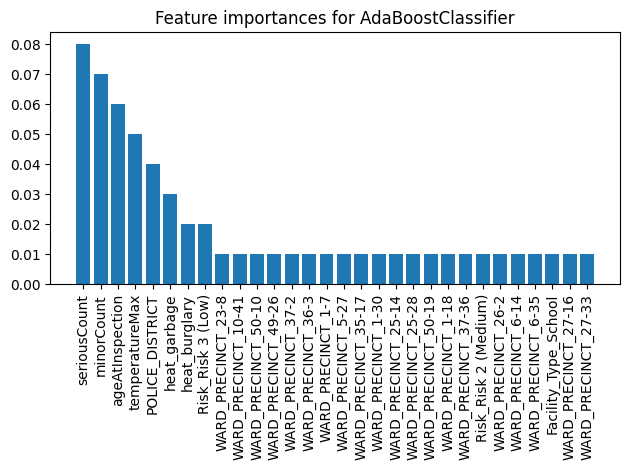

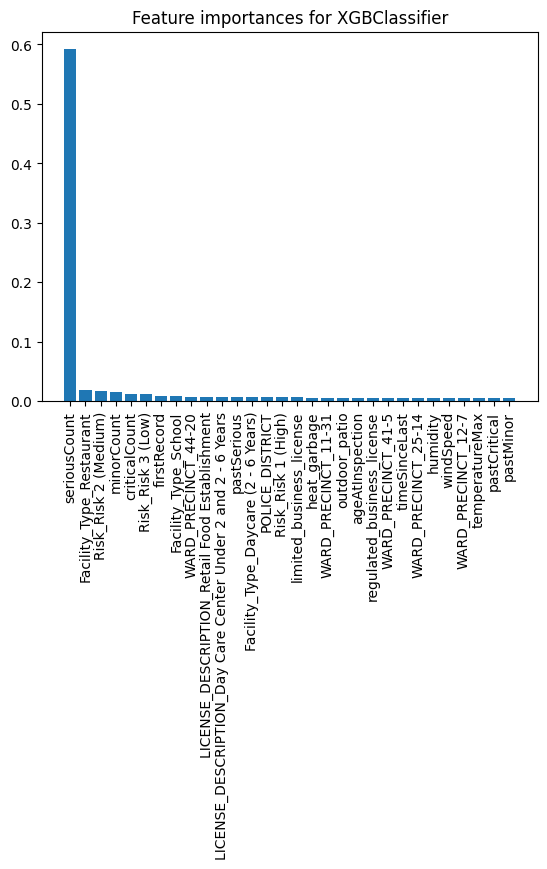

In [34]:
#Get feature importance and coefficient plots only - can't get this for voting classifiers
plot_models=models = [ada_classifier,
                     xgb_classifier]

#build a loop to get feature importance
for model in plot_models:
    if model.__class__.__name__ == "AdaBoostClassifier":
        importances = model.feature_importances_  
    elif model.__class__.__name__ == "XGBClassifier":
        importances = model.feature_importances_

     #get features into its own column   
    features = X.columns
    
    # Get top 30 features 
    importances_sorted = np.argsort(importances)[::-1]
    top_30 = importances_sorted[:30]
    
    fig = plt.figure() 
    plt.title(f"Feature importances for {model.__class__.__name__}")
    plt.bar(range(len(top_30)), importances[top_30])
    plt.xticks(range(len(top_30)), [features[i] for i in top_30], rotation=90)

    plt.tight_layout()
    plt.show()



AdaBoost has a more even distribution of variables leading to our predictions: seriousCount, minorCount, ageAtInspection, temperatureMAX, and POLICE_DISTRICT feature in our top 5. In contrast, for our XGBoost model, seriousCount is the predominant feature driving predictions, with all other features only contributing minor amounts to the prediction.

I'd be interested in seeing something like 5-10 year history of audits to see if there are repeat offenders even post-audit. I'd also be interested in seeing different restaurants by owner (assuming this is based on who applies for the permits) - again, with the idea that ownership can promote unsafe habits. Lastly, in a more unrealistic sense, if one could obtain profitability information for restaurants, it would be interesting to see if profit margin (or lagged profit margin) yields predictive value.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [49]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 



In [50]:
from sklearn.model_selection import cross_val_predict

#predict Y using cross_val_predict
y_proba = cross_val_predict(xgb_classifier, X, y.ravel(), method='predict_proba', cv=5)

In [26]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
chicago_inspections_2011_to_2013['Fail_Probability'] = y_proba[:, 1]
df_audit_ordered = chicago_inspections_2011_to_2013.sort_values(by='Fail_Probability', ascending=False)

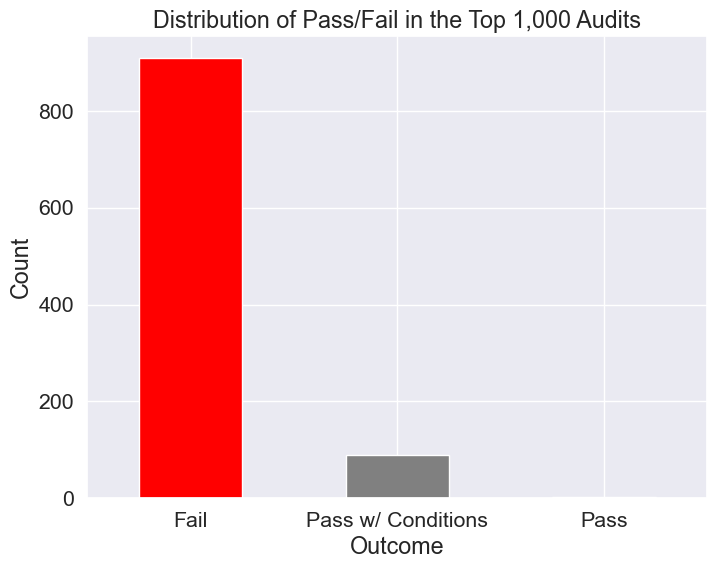

In [51]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
top_1000 = df_audit_ordered.head(1000)

# Plot the distribution
plt.figure(figsize=(8, 6))
top_1000['Results'].value_counts().plot(kind='bar', color=['red', 'gray','green'])
plt.title('Distribution of Pass/Fail in the Top 1,000 Audits')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

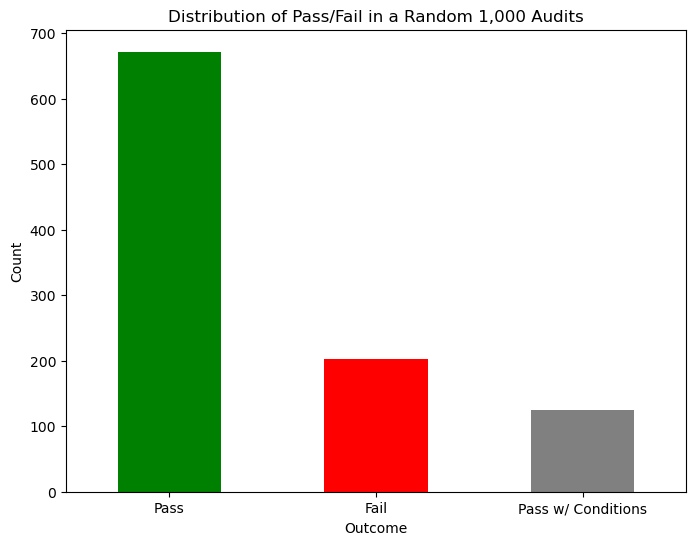

In [39]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

random_1000 = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)

#re-get new y and x
y = random_1000['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = random_1000.drop(columns = ['Results'])
X = pd.get_dummies(X)


#ok now CV predict
y_proba = cross_val_predict(xgb_classifier, X, y.ravel(), method='predict_proba', cv=5)

random_1000['Fail_Probability'] = y_proba[:, 1]
df_audit_random = random_1000.sort_values(by='Fail_Probability', ascending=False)

top_1000 = df_audit_random.head(1000)

# Plot the distribution
plt.figure(figsize=(8, 6))
top_1000['Results'].value_counts().plot(kind='bar', color=['green', 'red','gray'])
plt.title('Distribution of Pass/Fail in a Random 1,000 Audits')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

If we look at the 1000 riskiest establishments as predicted by our XGBoost algorithm, we see a very high proportion of outright fails, followed by passes with condition. This is in stark contrast to our 1000 random draws, where pass is the most common outcome. If we listen to our algorithm, it's clear we get more efficient targeting of audits vs just by random selection.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [41]:
# data processing
# -----------
# process target 
y_test2014 = chicago_inspections_2014['Results']
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014= lb_style.fit_transform(y)
# recode 0s and 1s so 1s are "Fail"
y_test2014= np.where(y_test2014 == 1, 0 ,1)

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results'])
X_test2014 = pd.get_dummies(X)

In [42]:
# predict and compare 
# -----------
y_proba2014 = cross_val_predict(xgb_classifier, X_test2014, y_test2014.ravel(), method='predict_proba', cv=5)

Confusion Matrix:
[[173  30]
 [ 46 751]]


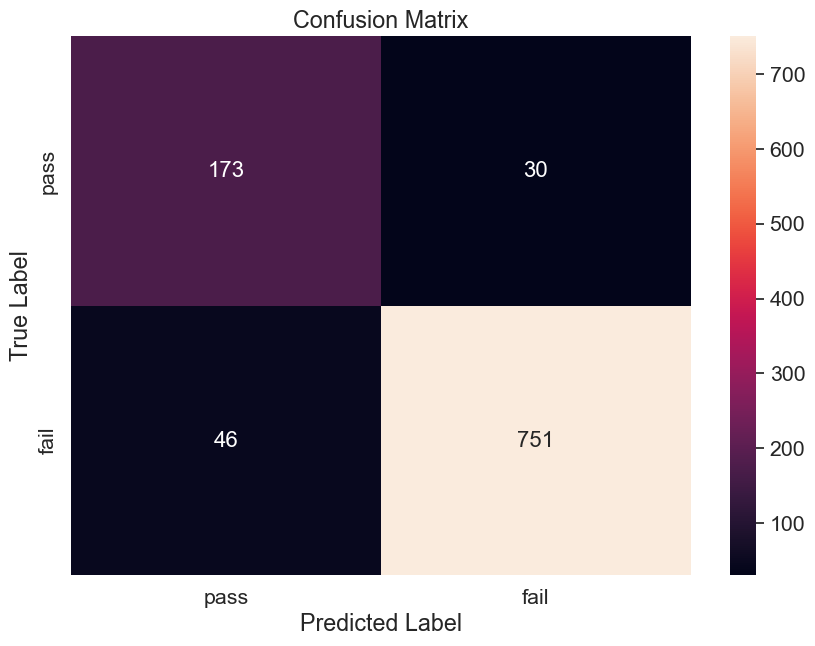

In [48]:
# evaluate
# -----------
#import a confusion matrix
from sklearn.metrics import confusion_matrix

# Convert probabilities to predicted labels
y_pred2014 = np.argmax(y_proba2014, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test2014, y_pred2014)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

df_cm = pd.DataFrame(conf_matrix, 
                     range(2),
                     range(2))

# plot the confusion matrix
# ----------
df_cm = df_cm.rename(index=str, 
                     columns={0: "pass", 1: "fail"})
df_cm.index = ["pass", "fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# specify labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
#FOR THE METRICS PART OF THIS QUESTION

#get labels for test and proba
y_true = y_test2014.ravel()
y_pred_proba = y_proba2014[:, 1]  

#threshold value for binary variable is .5
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

#get the metrics we did before
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9240
Precision: 0.9616
Recall: 0.9423
F1 Score: 0.9518


To be consistent, I think recall is pretty important for this sort of outcome given the potential issues with foodborne illness that can occur for restaurants with violations. In this case, we actually have quite strong recall, although getting even higher would be great. To be honest, our model performs really well across each of these four metrics, showing that this is a successful application of these methods.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Especially when dealing with imbalanced datasets where there may be more positives/negatives than the other, accuracy will not fully account for the impact of mistaken prediction for the minority outcome. In addition, false positives/negatives can be impactful in a way that accuracy alone is not going to account for. We've spoken about examples of recidivism and predictions around it as being harmful/impactful - while a model may be accurate overall, failing to minimize certain false prediction outcomes can be damaging to individuals or groups.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If the behavior being changed aligns with good behavior (e.g., reduction in reports of the restaurant to the health department), this isn't necessarily a bad thing. However, if the metrics are clearly being gamed, it's good to find variables that highly correlate with the behavior being changed - it is most preferable if these metrics are themselves things that restaurants are unlikely to change or pick up on. It's also possible to drop these game-able metrics from the prediction algorithm and seeing if the variation being predicted by these metrics are explained by other variables in the model. 

In practice, it's always going to be a tradeoff between hiding algorithms and their criteria to avoid prompting behavior change and making sure it's transparent enough such that public audits of fairness can be conducted. I personally like the ideas of an instrumental variables-esque approach to diversifying the algorithm over time - I know this is usually used to solve endogeneity issues, but theoretically it should also work to break the chain between the outcome affecting the exposure via behavior change over time (in my view).